# Plot the locations and regime time of selected USGS watersheds

This code prepares a spatial map of study sites (35) with their regime types according to seasonal soil moisture variations: (1) Interior, (2) Maritime. The regime type is determined using K-mean cluster technique where the covariates were changes in seasonal soil moisture.

Author: Sarfaraz Alam, Stanford University

In [1]:
# Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gp

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.basemap import Basemap

# Directory
idir_shp = 'C:\sarfaraz\SM_carryover/05_shape/'

In [2]:
# Function to plot points
def draw_points(gdf, mpl_map, sizecol = None, color = 'red', alpha = 0.7, edgecolor = None, fill = True, cmap = None):
    '''
    Turns a geopandas gdf of points into matplotlib lat/lon objects for friendly plotting with basemap. 
    '''
    lats = []
    lons = []
    for index, row in gdf.iterrows():
         for pt in list(row['geometry'].coords): 
            lats.append(pt[1])
            lons.append(pt[0])
    
    if sizecol is None:
        sizecol = 0.006
    else:
        sizecol = sizecol.values
    
    m.scatter(lons, lats, latlon=True, s = sizecol, alpha=alpha, c = color, edgecolor = edgecolor, cmap = cmap)

C:\Users\sarfa\anaconda3\envs\smoist\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\sarfa\AppData\Local\Temp\ipykernel_13484\4274945153.py:31: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m.drawmapscale(-111.5, 36.,lon0=gdf.centroid.x[0], lat0=gdf.centroid.y[0], length = 300, fontsize = 14, linewidth = 2)


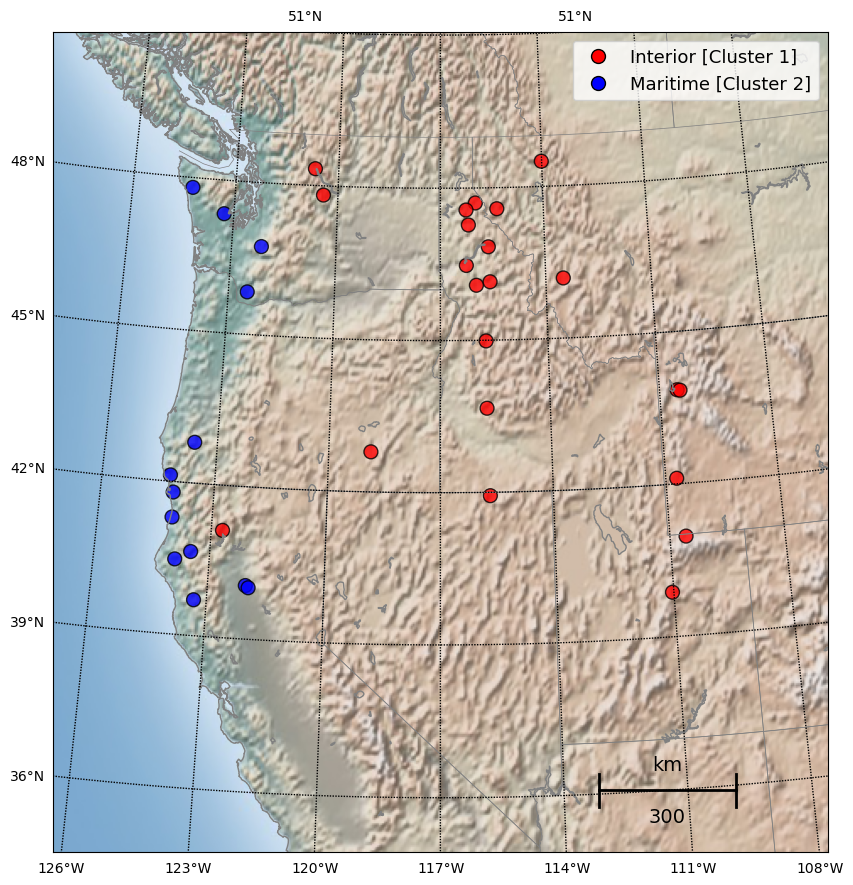

In [3]:
# read the location shapefile
gdf = gp.read_file(idir_shp + "03_watershed_loc.shp")
gdf.crs = {'init': 'epsg:4326'}

# 1. Draw the map background
fig = plt.figure(figsize=(10, 14))

m = Basemap(projection='lcc', resolution='h', 
            lat_0=43.0, lon_0=-117,
            width=1.7E6, height=1.8E6)


draw_points(gdf,m, alpha = .8, sizecol= (gdf["Cluster"]/gdf["Cluster"])*100,  color= gdf["Cluster"], edgecolor = 'black', cmap = 'bwr_r')

# Add elements to basemap 
m.shadedrelief(zorder = 0)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
# m.drawrivers(color = "blue")
# m.fillcontinents(color='none',lake_color='blue')

# Draw lines of latitude and longitude. Labels are like [left,right,top,bottom]
parallels = np.arange(0.,90.,3.)
meridians = np.arange(0.,360.,3.)

m.drawparallels(parallels,labels=[True,False,True,False]) # [left,right,top,bottom]
m.drawmeridians(meridians,labels=[True,False,False,True]) # [left,right,top,bottom]

# Scalebar
m.drawmapscale(-111.5, 36.,lon0=gdf.centroid.x[0], lat0=gdf.centroid.y[0], length = 300, fontsize = 14, linewidth = 2)

#====================================================
# Legend
#====================================================
# Make the first legend (upper right of map)
custom_lines = [Line2D([0], [0], linewidth=0, marker='o', markersize=10, markeredgecolor = 'black',markerfacecolor="red"),
                Line2D([0], [0], linewidth=0, marker='o', markersize=10, markeredgecolor = 'black',markerfacecolor="blue")
               ]

plt.legend(custom_lines, ["Interior [Cluster 1]", 'Maritime [Cluster 2]'], 
                    loc = "upper right",
                    prop={'size':13})

plt.show()